<a href="https://colab.research.google.com/github/Highashikata/Data-Analytics---Retail-Anlysis/blob/main/Retail_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Retail Data Analytics**


In this project, we will take the Kaggle Dataset https://www.kaggle.com/datasets/manjeetsingh/retaildataset.

### **Context**

The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

### **Content**

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Concerning the Datasets, we have 3 multiple databases:



*   Store Dataset.
*   sales Dataset.
*   Features Dataset.

### **Stores**

Anonymized information about the 45 stores, indicating the type and size of store

### **Features**

Contains additional data related to the store, department, and regional activity for the given dates.

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week


### **Sales**

Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week







In [3]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
## Importing the data
from google.colab import files
uploaded = files.upload()

Saving Features data set.csv to Features data set (1).csv
Saving sales data-set.csv to sales data-set (1).csv
Saving stores data-set.csv to stores data-set (1).csv


In [5]:
sales_data_set = pd.read_csv("sales data-set.csv")
features_data_set = pd.read_csv("Features data set.csv")
stores_data_set = pd.read_csv("stores data-set.csv")

In [7]:
display("Sale Data Set", sales_data_set.head(7))
display("Features Data Set", features_data_set.head(7))
display("Stores Data Set", stores_data_set.head(7))

'Sale Data Set'

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False


'Features Data Set'

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False


'Stores Data Set'

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713


In [8]:
df_sales = sales_data_set.copy()
df_stores = stores_data_set.copy()
df_features = features_data_set.copy()

In [15]:
### Data Pre-processing
## Determining the Unique Values in every Dataset

dfs = [df_sales, df_stores, df_features]
for df in dfs:
  for column in df:
    unique_values = np.unique(df[column])
    nbr_values = len(unique_values)
    if nbr_values < 36:
      print('The Number of Values for the Feature {} : {} ------- {}'.format(column, unique_values, nbr_values))
    else:
      print('The Number of values for the Feature {} : {}'.format(column, nbr_values))
  print(3*'------------------------')

The Number of values for the Feature Store : 45
The Number of values for the Feature Dept : 81
The Number of values for the Feature Date : 143
The Number of values for the Feature Weekly_Sales : 359464
The Number of Values for the Feature IsHoliday : [False  True] ------- 2
------------------------------------------------------------------------
The Number of values for the Feature Store : 45
The Number of Values for the Feature Type : ['A' 'B' 'C'] ------- 3
The Number of values for the Feature Size : 40
------------------------------------------------------------------------
The Number of values for the Feature Store : 45
The Number of values for the Feature Date : 182
The Number of values for the Feature Temperature : 4178
The Number of values for the Feature Fuel_Price : 1011
The Number of values for the Feature MarkDown1 : 4024
The Number of values for the Feature MarkDown2 : 2716
The Number of values for the Feature MarkDown3 : 2886
The Number of values for the Feature MarkDown4 

'---------------'

'---------------'

'---------------'

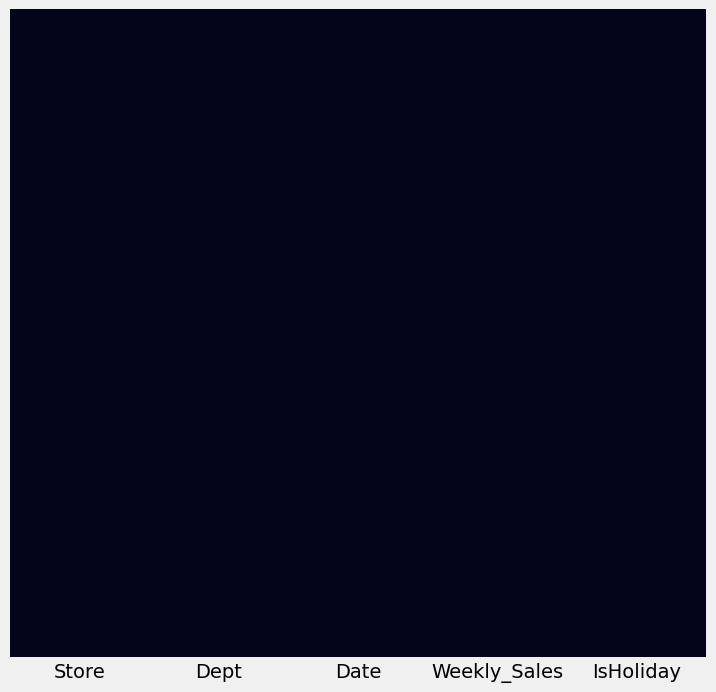

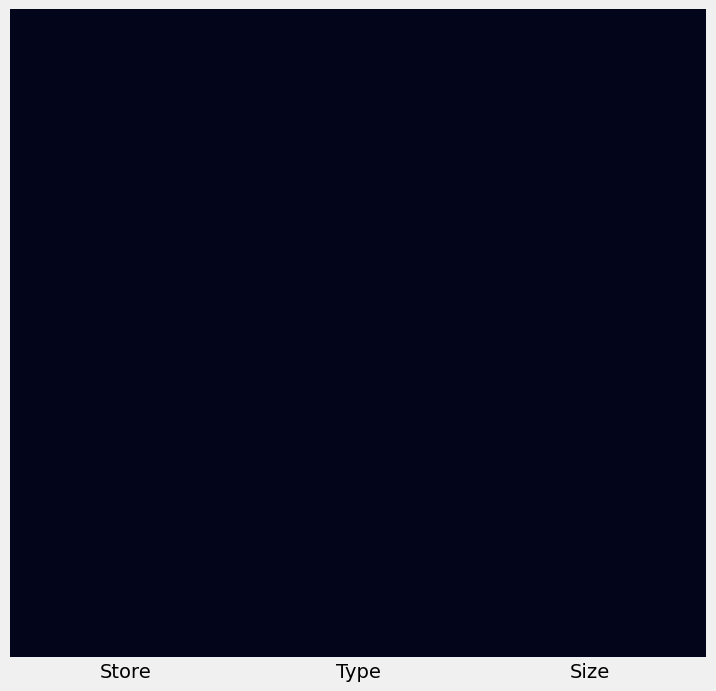

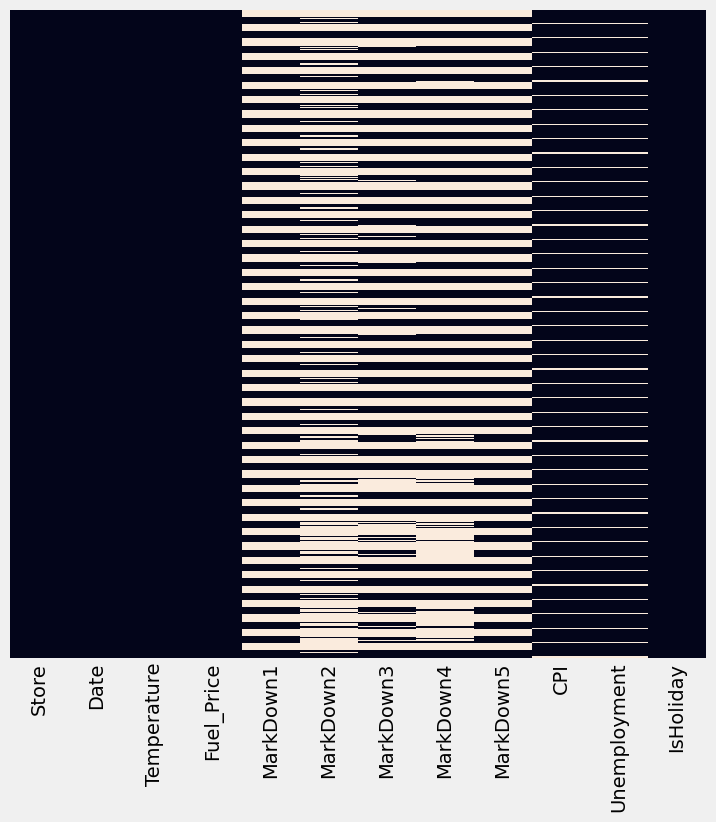

In [25]:
### Visualing missing values
import seaborn as sns
for df in dfs:
  fig, ax = plt.subplots(figsize=(8,8))
  sns.heatmap(df.isnull(), cbar = False, yticklabels = False, vmin=0.5, vmax=0.7, ax = ax)
  display(3*'-----')

In [17]:
### Data pre-processing : checking for missing values for every data set
for df in dfs:
  display(df.isnull().isna().any(), df.isnull().sum())
  print(3*"------")

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
dtype: bool

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

------------------


Store    False
Type     False
Size     False
dtype: bool

Store    0
Type     0
Size     0
dtype: int64

------------------


Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
IsHoliday       False
dtype: bool

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

------------------


In [23]:
data_date = df_features.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)

data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)

data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')

data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

In [21]:
display(data.describe())

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,95.000000,95.000000,95.000000,95.000000
mean,46.601399,60.171579,3.352644,171.538614,7.999315
std,5.399713,15.449706,0.434842,3.088921,0.488028
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.266000,2.863000,168.379190,7.508333
50%,46.000000,60.890889,3.487400,171.386189,8.150133
75%,47.000000,74.669778,3.708267,174.604988,8.428578
max,80.000000,81.580222,3.997778,176.652613,8.619311


In [22]:
data.head()

,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,,
01/04/2011,43,48.736444,3.602356,False,170.725418,8.150133
01/06/2012,48,72.943778,3.750822,False,175.603188,7.419533
01/07/2011,47,78.759111,3.675978,False,171.395827,8.097489
01/10/2010,42,69.868000,2.734333,False,168.354706,8.475289
02/03/2012,46,45.486444,3.696022,False,174.921137,7.508333


<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

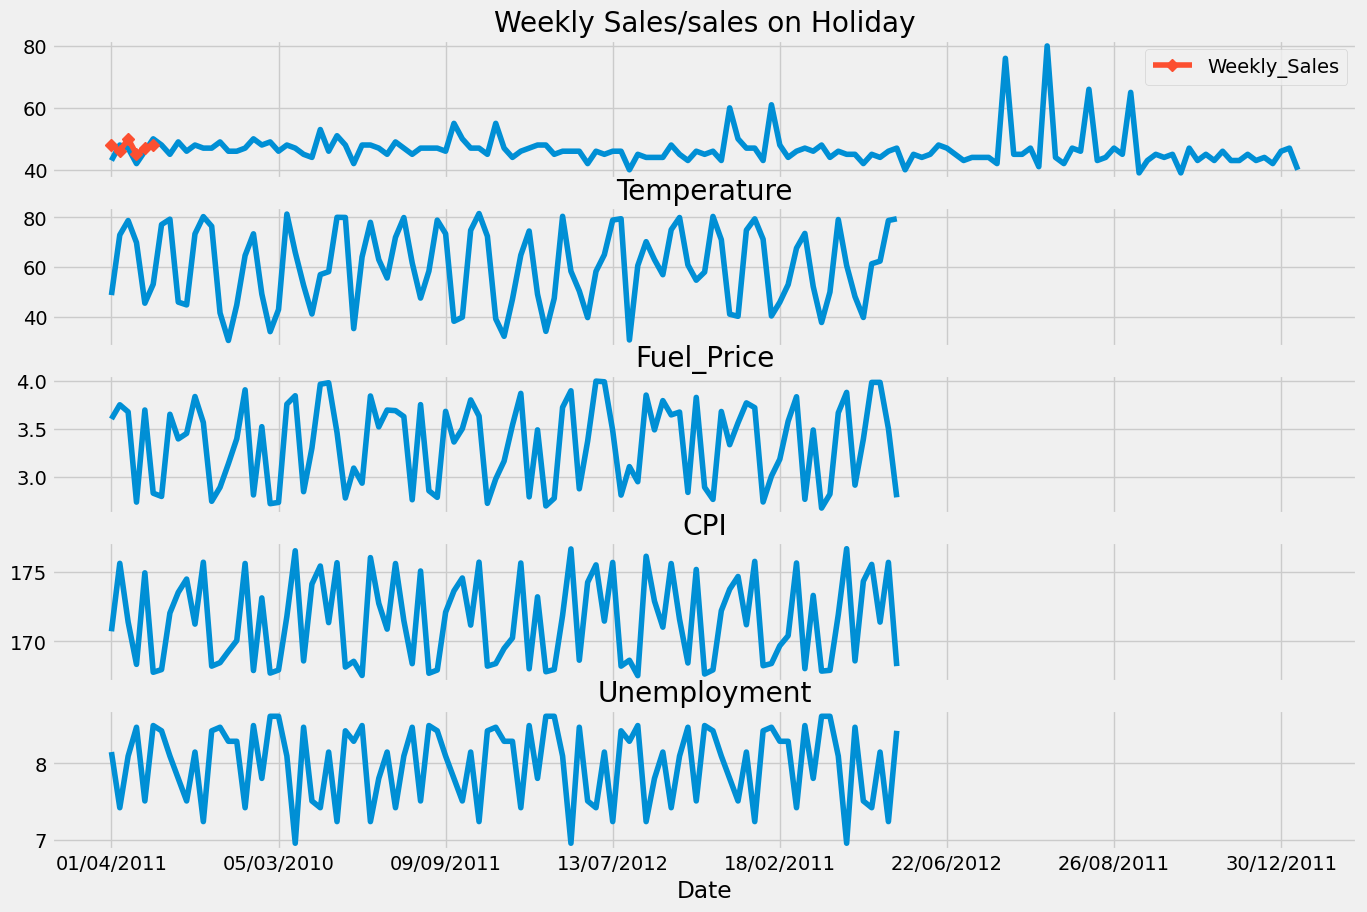

In [24]:
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

In [ ]:
b